In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as ex
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from category_encoders.count import CountEncoder
from sklearn.decomposition import PCA

In [ ]:
data = pd.read_csv("ECommerce_consumer behaviour.csv")
data.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,department_id,department,product_name
0,2425083,49125,1,2,18,NaN,17,1,0,13,pantry,baking ingredients
1,2425083,49125,1,2,18,NaN,91,2,0,16,dairy eggs,soy lactosefree
2,2425083,49125,1,2,18,NaN,36,3,0,16,dairy eggs,butter
3,2425083,49125,1,2,18,NaN,83,4,0,4,produce,fresh vegetables
4,2425083,49125,1,2,18,NaN,83,5,0,4,produce,fresh vegetables


In [ ]:
data.shape

(2019501, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2019501 entries, 0 to 2019500
Data columns (total 12 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   order_number            int64  
 3   order_dow               int64  
 4   order_hour_of_day       int64  
 5   days_since_prior_order  float64
 6   product_id              int64  
 7   add_to_cart_order       int64  
 8   reordered               int64  
 9   department_id           int64  
 10  department              object 
 11  product_name            object 
dtypes: float64(1), int64(9), object(2)
memory usage: 184.9+ MB


In [ ]:
data.isna().sum()

order_id                       0
user_id                        0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    124342
product_id                     0
add_to_cart_order              0
reordered                      0
department_id                  0
department                     0
product_name                   0
dtype: int64

In [ ]:
data.nunique()

order_id                  200000
user_id                   105273
order_number                 100
order_dow                      7
order_hour_of_day             24
days_since_prior_order        31
product_id                   134
add_to_cart_order            137
reordered                      2
department_id                 21
department                    21
product_name                 134
dtype: int64

In [ ]:
# data['days_since_prior_order'].value_counts(dropna=True)

In [ ]:
data["days_since_prior_order"].unique()

array([nan,  3.,  6.,  7., 30., 20.,  4.,  8., 15., 10., 28.,  9., 12.,
       11.,  2., 25., 13., 29., 14., 21.,  5.,  1., 18.,  0., 19., 17.,
       22., 26., 24., 16., 23., 27.])

In [ ]:
data["department"].unique()

array(['pantry', 'dairy eggs', 'produce', 'canned goods', 'meat seafood',
       'frozen', 'bakery', 'beverages', 'breakfast', 'snacks',
       'international', 'household', 'personal care', 'babies', 'deli',
       'dry goods pasta', 'missing', 'alcohol', 'pets', 'bulk', 'other'],
      dtype=object)

In [ ]:
data["product_name"].value_counts().head(10)

product_name
fresh fruits                     226039
fresh vegetables                 212611
packaged vegetables fruits       109596
yogurt                            90751
packaged cheese                   61502
milk                              55150
water seltzer sparkling water     52564
chips pretzels                    45306
soy lactosefree                   39389
bread                             36381
Name: count, dtype: int64

In [ ]:
data["days_since_prior_order"] = data["days_since_prior_order"].fillna(-1).astype(int)

<Axes: >

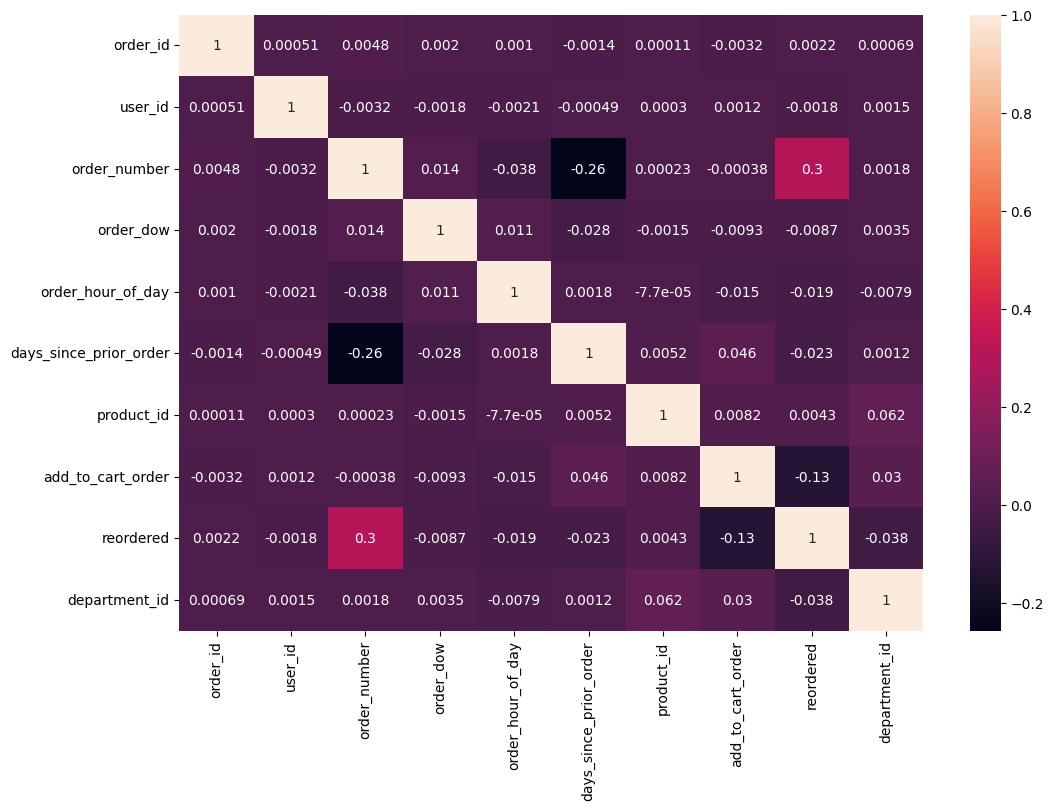

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.drop(["department", "product_name"], axis=1).corr(), annot=True)

In [ ]:
# data.groupby('order_id')['reordered'].agg(['count']).sort_values(by='count',ascending=False).plot(kind='pie',autopct='%1.2f%%',subplots=True,title='Number of order took place',figsize=(9,9))


In [ ]:
# The number of order take place
order_place = data.groupby("reordered")["user_id"].agg(["count"]).reset_index()
fig = ex.pie(
    order_place,
    values="count",
    names="reordered",
    title="The Number Reorder take place by Users",
)
fig.show()

In [ ]:
data.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name'],
      dtype='object')

In [ ]:
data.order_number.unique()

array([  1,  14,  81,   3,  11,   5,  12,  78,   2,  10,  13,   8,   6,
         4,  23,  59,  25,  36,  19,   7,  63,  51,  28,   9,  18,  27,
        61,  30,  91,  46,  21,  42,  16,  41,  62,  32,  52,  20,  56,
        15,  68,  33,  50,  38,  17,  55,  44,  26,  72,  67,  29,  45,
        58,  43,  34,  66,  35,  47,  53,  48,  24,  31,  77,  22,  57,
        93,  86,  80,  40,  39,  82,  74,  49,  37,  71,  69,  70,  60,
       100,  96,  75,  87,  90,  54,  98,  65,  76,  83,  84,  79,  92,
        97,  64,  73,  95,  88,  85,  89,  99,  94], dtype=int64)

In [ ]:
data.groupby("order_number")["user_id"].agg(["count"])

,count
order_number,
1,124342
2,122397
3,120627
4,118573
5,105482
...,...
96,1051
97,834
98,964


In [ ]:
def order_group(x):
    if x <= 20:
        x = "1-20 orders"
    elif x > 20 and x < 40:
        x = "21-40 orders"
    elif x < 60:
        x = "41-60 orders"
    else:
        x = "81-100 orders"
    return x

In [ ]:
data["order_number_group"] = data["order_number"].apply(order_group)

In [ ]:
data["order_number_group"].value_counts()

order_number_group
1-20 orders      1426484
21-40 orders      369280
41-60 orders      146541
81-100 orders      77196
Name: count, dtype: int64

In [ ]:
no_of_order_place_by_user = (
    data.groupby("order_number_group")["user_id"].agg(["count"]).reset_index()
)
fig = ex.pie(no_of_order_place_by_user, values="count", names="order_number_group")
fig.show()

In [ ]:
order_dow_by_user = data.groupby("order_dow")["user_id"].agg(["count"]).reset_index()
fig = ex.pie(
    order_dow_by_user,
    values="count",
    names="order_dow",
    title="Number of Purchase by day",
)
fig.show()

In [ ]:
data.order_hour_of_day.unique()

array([18, 17, 16, 11, 10,  1,  8,  6,  2,  9, 12, 13, 14, 19, 21, 15, 20,
        7, 22,  4, 23,  0,  5,  3], dtype=int64)

In [ ]:
def order_time(x):
    if x >= 5 and x <= 11:
        return "Morning"
    elif x > 11 and x <= 17:
        return "Afternoon"
    elif x > 17 and x <= 23:
        return "Night"
    else:
        return "Midnight"

In [ ]:
data["order_time"] = data["order_hour_of_day"].apply(order_time)

In [ ]:
data["order_time"].value_counts()

order_time
Afternoon    952505
Morning      678767
Night        356992
Midnight      31237
Name: count, dtype: int64

In [ ]:
order_place_time = data.groupby("order_time")["user_id"].agg(["count"]).reset_index()
fig = ex.bar(order_place_time, x="order_time", y="count")
fig.show()

In [ ]:
order_by_day_and_time = data.pivot_table(
    index="order_dow", columns="order_time", values="user_id", aggfunc="count"
).reset_index()
new_order_by_day_and_time = order_by_day_and_time.melt(
    id_vars="order_dow",
    value_vars=order_by_day_and_time.columns[1:],
    var_name="order_time",
    value_name="count",
)
fig = ex.bar(
    new_order_by_day_and_time,
    x="order_dow",
    y="count",
    color="order_time",
    barmode="group",
    labels={
        "order_dow": "Day of Week",
        "count": "User Count",
        "order_time": "Order Time",
    },
    title="User Orders by Day of Week and Time of Day",
)
fig.show()

In [ ]:
history_of_order = (
    data.groupby("days_since_prior_order")["user_id"]
    .agg("count")
    .reset_index()
    .sort_values(by="days_since_prior_order", ascending=False)
)
fig = ex.bar(history_of_order, x="days_since_prior_order", y="user_id")
fig.show()

In [ ]:
data.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'department_id', 'department', 'product_name',
       'order_number_group', 'order_time'],
      dtype='object')

In [ ]:
top_20_popular_products = (
    data.groupby("product_name")["user_id"]
    .agg(["count"])
    .reset_index()
    .sort_values(by="count", ascending=False)
    .head(20)
)

fig = ex.pie(
    top_20_popular_products,
    values="count",
    names="product_name",
    title="Top 20 Most popular Products",
)
fig.show()

In [ ]:
order_place_by_department = (
    data.groupby("department")["reordered"]
    .agg(["count"])
    .reset_index()
    .sort_values(by="count", ascending=False)
)
fig = ex.bar(order_place_by_department, y="department", x="count")
fig.show()

In [ ]:
pantry_weight = (
    data[data["department"] == "pantry"]["department"].value_counts() / len(data) * 100
)

In [ ]:
data.department.unique()

array(['pantry', 'dairy eggs', 'produce', 'canned goods', 'meat seafood',
       'frozen', 'bakery', 'beverages', 'breakfast', 'snacks',
       'international', 'household', 'personal care', 'babies', 'deli',
       'dry goods pasta', 'missing', 'alcohol', 'pets', 'bulk', 'other'],
      dtype=object)

In [ ]:
new_data = data.groupby(["user_id", "department"])["product_name"].sum()

In [ ]:
new_data

user_id  department
2        dairy eggs                       packaged cheesepackaged cheese
         deli          lunch meatprepared soups saladsfresh dips tape...
         produce                    fresh fruitsfresh fruitsfresh fruits
         snacks                      popcorn jerkycrackerschips pretzels
3        beverages                         water seltzer sparkling water
                                             ...                        
206209   frozen                                           frozen produce
         household     laundrytrash bags linersfood storagedish deter...
         pantry                                        spices seasonings
         produce       packaged vegetables fruitsfresh fruitsfresh fr...
         snacks                                         crackerscrackers
Name: product_name, Length: 639006, dtype: object

In [ ]:
# transactions = [a[1]['product_name'].tolist() for a in list(data.groupby(['user_id','department']))]

In [ ]:
transactions = [
    a[1]["product_name"].tolist() for a in list(data.groupby(["user_id", "department"]))
]

In [ ]:
transactions

[['packaged cheese', 'packaged cheese'],
 ['lunch meat', 'prepared soups salads', 'fresh dips tapenades'],
 ['fresh fruits', 'fresh fruits', 'fresh fruits'],
 ['popcorn jerky', 'crackers', 'chips pretzels'],
 ['water seltzer sparkling water'],
 ['other creams cheeses',
  'packaged cheese',
  'soy lactosefree',
  'soy lactosefree',
  'soy lactosefree'],
 ['ice cream ice', 'frozen breakfast'],
 ['paper goods'],
 ['spreads'],
 ['fresh fruits',
  'packaged vegetables fruits',
  'fresh fruits',
  'fresh fruits',
  'packaged vegetables fruits',
  'packaged vegetables fruits'],
 ['nuts seeds dried fruit', 'nuts seeds dried fruit', 'crackers'],
 ['bread'],
 ['refrigerated',
  'coffee',
  'refrigerated',
  'refrigerated',
  'refrigerated',
  'coffee',
  'refrigerated'],
 ['canned meals beans', 'canned fruit applesauce'],
 ['packaged cheese', 'other creams cheeses', 'yogurt', 'soy lactosefree'],
 ['lunch meat', 'lunch meat', 'lunch meat'],
 ['frozen meals'],
 ['meat counter'],
 ['fresh fruits', 

In [ ]:
first_20_transaction = transactions[:20]

for i, transaction in enumerate(first_20_transaction):
    print(f"Transaction {i+1}:{transaction}")

Transaction 1:['packaged cheese', 'packaged cheese']
Transaction 2:['lunch meat', 'prepared soups salads', 'fresh dips tapenades']
Transaction 3:['fresh fruits', 'fresh fruits', 'fresh fruits']
Transaction 4:['popcorn jerky', 'crackers', 'chips pretzels']
Transaction 5:['water seltzer sparkling water']
Transaction 6:['other creams cheeses', 'packaged cheese', 'soy lactosefree', 'soy lactosefree', 'soy lactosefree']
Transaction 7:['ice cream ice', 'frozen breakfast']
Transaction 8:['paper goods']
Transaction 9:['spreads']
Transaction 10:['fresh fruits', 'packaged vegetables fruits', 'fresh fruits', 'fresh fruits', 'packaged vegetables fruits', 'packaged vegetables fruits']
Transaction 11:['nuts seeds dried fruit', 'nuts seeds dried fruit', 'crackers']
Transaction 12:['bread']
Transaction 13:['refrigerated', 'coffee', 'refrigerated', 'refrigerated', 'refrigerated', 'coffee', 'refrigerated']
Transaction 14:['canned meals beans', 'canned fruit applesauce']
Transaction 15:['packaged cheese'

In [ ]:
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

In [ ]:
transactions

[['packaged cheese', 'packaged cheese'],
 ['lunch meat', 'prepared soups salads', 'fresh dips tapenades'],
 ['fresh fruits', 'fresh fruits', 'fresh fruits'],
 ['popcorn jerky', 'crackers', 'chips pretzels'],
 ['water seltzer sparkling water'],
 ['other creams cheeses',
  'packaged cheese',
  'soy lactosefree',
  'soy lactosefree',
  'soy lactosefree'],
 ['ice cream ice', 'frozen breakfast'],
 ['paper goods'],
 ['spreads'],
 ['fresh fruits',
  'packaged vegetables fruits',
  'fresh fruits',
  'fresh fruits',
  'packaged vegetables fruits',
  'packaged vegetables fruits'],
 ['nuts seeds dried fruit', 'nuts seeds dried fruit', 'crackers'],
 ['bread'],
 ['refrigerated',
  'coffee',
  'refrigerated',
  'refrigerated',
  'refrigerated',
  'coffee',
  'refrigerated'],
 ['canned meals beans', 'canned fruit applesauce'],
 ['packaged cheese', 'other creams cheeses', 'yogurt', 'soy lactosefree'],
 ['lunch meat', 'lunch meat', 'lunch meat'],
 ['frozen meals'],
 ['meat counter'],
 ['fresh fruits', 

In [ ]:
# head_cols = [{'Product': ' '.join(col)} for col in te.columns_[:20]]
# df = pd.DataFrame(head_cols)
# print(df)

In [ ]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
transactions = pd.DataFrame(te_ary, columns=te.columns_)
pt = transactions.describe()
pt

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
count,639006,639006,639006,639006,639006,639006,639006,639006,639006,639006,...,639006,639006,639006,639006,639006,639006,639006,639006,639006,639006
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,638062,631396,638572,638554,632592,637201,625861,637761,638660,637531,...,625783,629963,633844,629603,637236,637208,636663,612103,637855,603025


In [ ]:
te_ary

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
pt.shape

(4, 134)

In [ ]:
f = pt.iloc[0] - pt.iloc[3]
a = f.tolist()
# print(a)
b = list(f.index)
# print(b)

item = pd.DataFrame([[a[r], b[r]] for r in range(len(a))], columns=["Count", "Item"])
item = item.sort_values(by="Count", ascending=False).head(50)
transactions

,air fresheners candles,asian foods,baby accessories,baby bath body care,baby food formula,bakery desserts,baking ingredients,baking supplies decor,beauty,beers coolers,...,spreads,tea,tofu meat alternatives,tortillas flat bread,trail mix snack mix,trash bags liners,vitamins supplements,water seltzer sparkling water,white wines,yogurt
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
639001,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639002,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
639003,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
639004,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [ ]:
item

,Count,Item
50,66823,fresh fruits
53,56265,fresh vegetables
98,49230,packaged vegetables fruits
133,35981,yogurt
93,34049,packaged cheese
83,32024,milk
131,26903,water seltzer sparkling water
25,25682,chips pretzels
11,24363,bread
119,24001,soy lactosefree


In [ ]:
fig = ex.treemap(item, path=["Item"], values="Count")
fig.update_layout(
    title="Visualizing Item Counts with a Treemap", title_font_size=20, title_x=0.5
)
fig.show()

In [ ]:
frequent_items = apriori(transactions, min_support=0.005, use_colnames=True, max_len=2)
rules = association_rules(frequent_items, metric="lift", min_threshold=1.5).iloc[:, 0:7]
# rules

In [ ]:
rules.sort_values(by="lift", ascending=False).head(50)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift
55,(pasta sauce),(dry pasta),0.016995,0.018585,0.006576,0.386924,20.819053
54,(dry pasta),(pasta sauce),0.018585,0.016995,0.006576,0.353823,20.819053
19,(canned jarred vegetables),(canned meals beans),0.019266,0.018318,0.006383,0.331330,18.088139
18,(canned meals beans),(canned jarred vegetables),0.018318,0.019266,0.006383,0.348484,18.088139
20,(soup broth bouillon),(canned jarred vegetables),0.022332,0.019266,0.006307,0.282411,14.658606
21,(canned jarred vegetables),(soup broth bouillon),0.019266,0.022332,0.006307,0.327350,14.658606
23,(soup broth bouillon),(canned meals beans),0.022332,0.018318,0.005715,0.255922,13.971412
22,(canned meals beans),(soup broth bouillon),0.018318,0.022332,0.005715,0.312003,13.971412
36,(crackers),(cookies cakes),0.028486,0.015102,0.005315,0.186563,12.353850
37,(cookies cakes),(crackers),0.015102,0.028486,0.005315,0.351917,12.353850


In [ ]:
product_detail = (
    data.groupby(["product_id", "product_name", "department"])["reordered"]
    .agg("count")
    .reset_index()
    .sort_values(by="reordered", ascending=False)
)

In [ ]:
product_detail

,product_id,product_name,department,reordered
23,24,fresh fruits,produce,226039
82,83,fresh vegetables,produce,212611
122,123,packaged vegetables fruits,produce,109596
119,120,yogurt,dairy eggs,90751
20,21,packaged cheese,dairy eggs,61502
...,...,...,...,...
9,10,kitchen supplies,household,561
101,102,baby bath body care,babies,515
81,82,baby accessories,babies,504
131,132,beauty,personal care,387


In [ ]:
reordered_product = (
    product_detail.groupby("reordered")["product_id"]
    .sum()
    .reset_index()
    .sort_values(by="reordered", ascending=False)
)
fig = ex.bar(reordered_product, x="product_id", y="reordered")
fig.show()

In [ ]:
# encoding features
# df = data[['user_id','department']]

In [ ]:
data.product_name.nunique()

134

In [ ]:
new_data = data.copy()

In [ ]:
count = CountEncoder()
new_data["department"] = count.fit_transform(new_data["department"])
new_data["product_name"] = count.fit_transform(new_data["product_name"])

In [ ]:
new_data = new_data.drop(
    [
        "user_id",
        "department_id",
        "product_id",
        "order_id",
        "order_number_group",
        "order_time",
    ],
    axis=1,
)

In [ ]:
new_data.columns

Index(['order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'add_to_cart_order', 'reordered',
       'department', 'product_name'],
      dtype='object')

In [ ]:
scaler = MinMaxScaler()
X_sc = scaler.fit_transform(new_data)

In [ ]:
kmeans = KMeans(n_clusters=6)
kmeans.fit(X_sc)
print("clusters", kmeans.labels_)
print("inertia", kmeans.inertia_)

clusters [5 5 5 ... 1 1 4]
inertia 520177.342585181


In [ ]:
# 9118872.908321965

In [ ]:
ssd = []

for k in range(2, 40):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_sc)
    ssd.append(kmeans.inertia_)

Text(0, 0.5, ' Sum of Squared Distances')

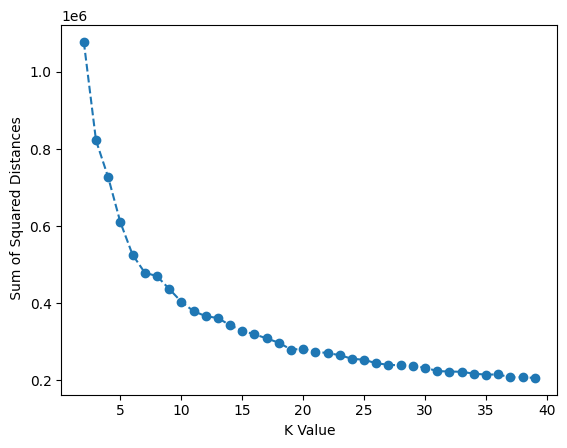

In [ ]:
plt.plot(range(2, 40), ssd, "o--")
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")

In [ ]:
# model = KMeans(n_clusters=20)
# model.fit(X_sc)
# print('clusters',model.labels_)
# print('inertia',model.inertia_)

In [ ]:
elbow_point = [15, 20, 25, 30, 35, 40]
inertia = {}
clusters = {}
for el in elbow_point:
    model = KMeans(n_clusters=el)
    model.fit(X_sc)
    clusters[el] = model.labels_
    inertia[el] = model.inertia_

In [ ]:
inertia

{15: 323264.5528773182,
 20: 288018.1435749506,
 25: 251724.48837776447,
 30: 229013.4343464164,
 35: 219970.18672485254,
 40: 203181.2930879215}

In [ ]:
clusters

{15: array([ 4, 13, 13, ..., 12, 12, 12]),
 20: array([15,  3,  3, ...,  1,  1,  6]),
 25: array([21,  5,  5, ..., 12, 12,  8]),
 30: array([28, 23, 23, ...,  1,  1,  1]),
 35: array([26, 17, 17, ..., 20, 20, 20]),
 40: array([ 3, 37, 37, ..., 14, 14, 14])}

In [ ]:
new_model = KMeans(n_clusters=40)
new_model.fit(X_sc)
new_model.labels_

# predictions
predictions = new_model.predict(X_sc)
unique, counts = np.unique(predictions, return_counts=True)
counts = counts.reshape(1, 40)

countscldf = pd.DataFrame(counts)
countscldf

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,71652,56622,38066,81715,61590,27489,52254,38680,41892,41875,...,20503,55688,62088,68752,34229,27843,67902,58934,71774,43064


In [ ]:
pca = PCA(n_components=2)
X_r = pca.fit_transform(X_sc)

In [ ]:
print(
    "Explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)

Explained variance ratio (first two components): [0.35022482 0.27662073]


In [ ]:
n_components = X_sc.shape[1]
pca = PCA(n_components=n_components)
X_r = pca.fit_transform(X_sc)
total_variance = sum(pca.explained_variance_)
print("Total Variance in our dataset is: ", total_variance)
var_95 = total_variance * 0.95
print("The 95% variance we want to have is: ", var_95)
print("")

a = zip(range(0, n_components), pca.explained_variance_)
a = pd.DataFrame(a, columns=["PCA Comp", "Explained Variance"])

print("Variance explain with 4 n_compononets: ", sum(a["Explained Variance"][0:4]))
print("Variance explain with 8 n_compononets: ", sum(a["Explained Variance"][0:8]))
print("Variance explain with 9 n_compononets: ", sum(a["Explained Variance"][0:9]))
print("Variance explain with 10 n_compononets: ", sum(a["Explained Variance"][0:10]))
print("Variance explain with 15 n_compononets: ", sum(a["Explained Variance"][0:15]))
print("Variance explain with 18 n_compononets: ", sum(a["Explained Variance"][0:18]))
print("Variance explain with 21 n_compononets: ", sum(a["Explained Variance"][0:21]))

Total Variance in our dataset is:  0.7820333054468378
The 95% variance we want to have is:  0.7429316401744959

Variance explain with 4 n_compononets:  0.7022546704547561
Variance explain with 8 n_compononets:  0.7820333054468378
Variance explain with 9 n_compononets:  0.7820333054468378
Variance explain with 10 n_compononets:  0.7820333054468378
Variance explain with 15 n_compononets:  0.7820333054468378
Variance explain with 18 n_compononets:  0.7820333054468378
Variance explain with 21 n_compononets:  0.7820333054468378


In [ ]:
pca = PCA(n_components=4)
X_r = pca.fit_transform(X_sc)

tune_inertia = {}
tune_clusters = {}

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_r)
    tune_clusters[k] = kmeans.labels_
    tune_inertia[k] = kmeans.inertia_

In [ ]:
tune_inertia

{2: 916801.2247463113,
 3: 661803.009642435,
 4: 575413.3095176701,
 5: 437713.2516665853,
 6: 359889.0874762538,
 7: 349916.3691562335,
 8: 339609.9221339205,
 9: 250162.5642136934,
 10: 252103.47861619337,
 11: 217411.85412032975,
 12: 213882.0484861424,
 13: 203347.93215824122,
 14: 178355.34903694736,
 15: 180084.00924199336,
 16: 167716.860535633,
 17: 151076.75661667043,
 18: 142855.84091397363,
 19: 146846.7108912442}

Text(0, 0.5, ' Sum of Squared Distances')

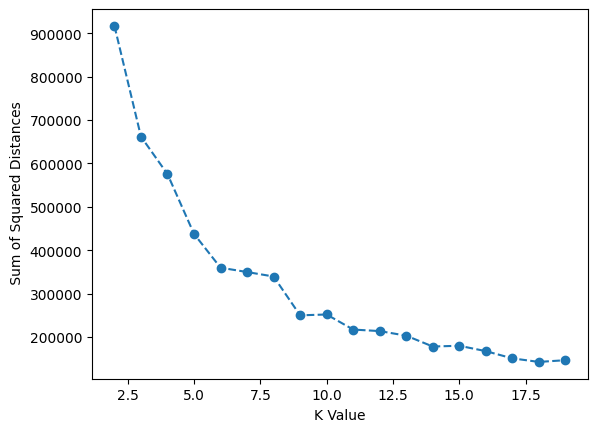

In [ ]:
plt.plot(range(2, 20), list(tune_inertia.values()), "o--")
plt.xlabel("K Value")
plt.ylabel(" Sum of Squared Distances")